### Minimum Daily Temperatures Dataset
This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

Link: https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 

df=pd.read_csv('MinimumTemp.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [3]:
# import package
from kats.consts import TimeSeriesData

df = df.rename(columns={"Date": "time", "Temp": "value"})
df = df[["time", "value"]]
ts_bocpd = TimeSeriesData(df)
ts_bocpd

,time,value
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [4]:
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters

# Initialize the detector
detector = BOCPDetector(ts_bocpd)


changepoints = detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL, threshold=0.8 # this is the default choice
)

In [5]:
# add column for monthly average
df['time'] = pd.to_datetime(df['time'])
df['month_year'] = df['time'].dt.to_period('M')
df_agg = df.groupby('month_year').agg('mean')
df_agg = df_agg.reset_index()
#rename columns
df_agg['monthly_avg'] = df['value']
df_agg = df_agg[['month_year','monthly_avg']]
df_agg

,month_year,monthly_avg
0,1981-01,20.7
1,1981-02,17.9
2,1981-03,18.8
3,1981-04,14.6
4,1981-05,15.8
...,...,...
115,1990-08,7.4
116,1990-09,9.9
117,1990-10,9.3
118,1990-11,9.9


In [6]:
# add column for yearly average
#df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.to_period('Y')
df_year = df.groupby('year').agg('mean')
df_year = df_year.reset_index()
df_year

,year,value
0,1981,11.517260
1,1982,10.783562
2,1983,11.187397
3,1984,10.591781
4,1985,11.137534
5,1986,10.803288
6,1987,10.853151
7,1988,11.972055
8,1989,11.261918
9,1990,11.669589


In [7]:
#rename columns
df_year['yearly_avg'] = df_year['value']
df_year = df_year[['year','yearly_avg']]
df_year

,year,yearly_avg
0,1981,11.517260
1,1982,10.783562
2,1983,11.187397
3,1984,10.591781
4,1985,11.137534
5,1986,10.803288
6,1987,10.853151
7,1988,11.972055
8,1989,11.261918
9,1990,11.669589


In [8]:
df

,time,value,month_year,year
0,1981-01-01,20.7,1981-01,1981
1,1981-01-02,17.9,1981-01,1981
2,1981-01-03,18.8,1981-01,1981
3,1981-01-04,14.6,1981-01,1981
4,1981-01-05,15.8,1981-01,1981
...,...,...,...,...
3645,1990-12-27,14.0,1990-12,1990
3646,1990-12-28,13.6,1990-12,1990
3647,1990-12-29,13.5,1990-12,1990
3648,1990-12-30,15.7,1990-12,1990


In [9]:
#add monthly avg and year to df
df_new = pd.merge(df, df_agg, on ='month_year', how ='outer')
df_new2 = pd.merge(df_new, df_year, on = 'year', how = 'outer')
df_new2

,time,value,month_year,year,monthly_avg,yearly_avg
0,1981-01-01,20.7,1981-01,1981,20.7,11.517260
1,1981-01-02,17.9,1981-01,1981,20.7,11.517260
2,1981-01-03,18.8,1981-01,1981,20.7,11.517260
3,1981-01-04,14.6,1981-01,1981,20.7,11.517260
4,1981-01-05,15.8,1981-01,1981,20.7,11.517260
...,...,...,...,...,...,...
3645,1990-12-27,14.0,1990-12,1990,7.4,11.669589
3646,1990-12-28,13.6,1990-12,1990,7.4,11.669589
3647,1990-12-29,13.5,1990-12,1990,7.4,11.669589
3648,1990-12-30,15.7,1990-12,1990,7.4,11.669589


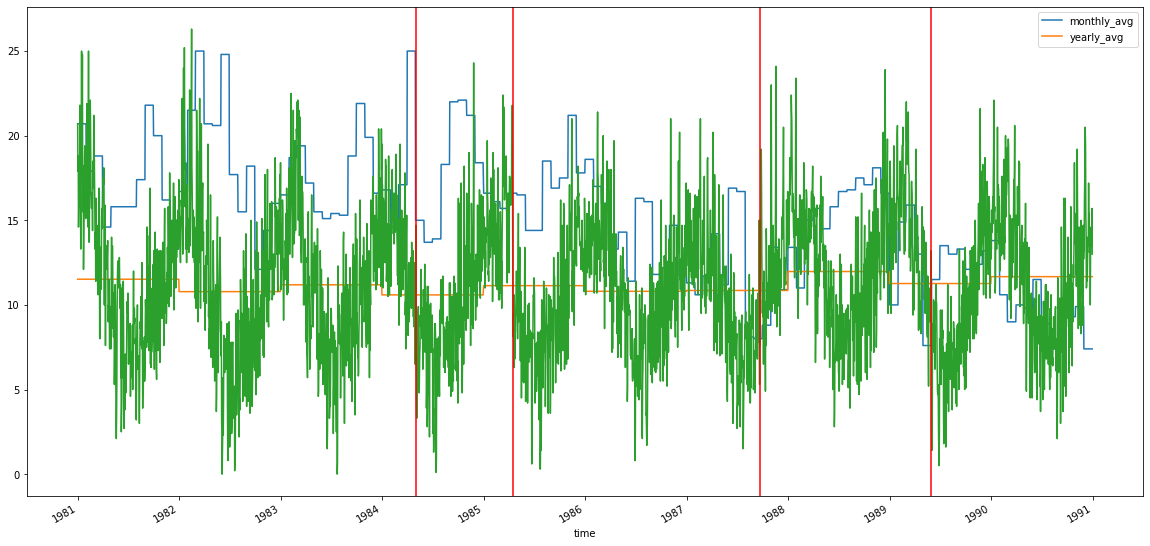

In [12]:
import matplotlib.pyplot as plt

df_new2.plot(x="time", y=["monthly_avg", 'yearly_avg'], kind="line", figsize=(20, 10))
detector.plot(changepoints)
plt.show()

In [15]:
for i in changepoints:
    print(str(i[0].start_time)[:10])
    temp = df_new.loc[df_new['time'] == str(i[0].start_time)[:10]]
    print(temp)


1984-05-03
           time  value month_year  year  monthly_avg
1218 1984-05-03    9.1    1984-05  1984         15.0
1985-04-15
           time  value month_year  year  monthly_avg
1564 1985-04-15   15.1    1985-04  1985         16.6
1987-09-24
           time  value month_year  year  monthly_avg
2456 1987-09-24   14.0    1987-09  1987          8.0
1989-05-31
           time  value month_year  year  monthly_avg
3070 1989-05-31    6.6    1989-05  1989          7.6
